<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2
# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# get project dir
pp = PurePath(Path.cwd()).parts[:-1]
pdir = PurePath(*pp)
script_dir = pdir / 'src' 
viz_dir = pdir / 'report' / 'figures'
data_dir = pdir / 'data'
script_dirs = list(Path(script_dir).glob('./*/'))
for sdir in script_dirs: sys.path.append(sdir.as_posix())

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
import pymc3 as pm
from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
from utils import cprint
from bars import get_imbalance

RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

2018-04-25T13:47:30-06:00

CPython 3.6.4
IPython 6.2.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.13.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 12
interpreter: 64bit


/media/bcr/HDD/anaconda3/envs/bayes_dash/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/media/bcr/HDD/anaconda3/envs/bayes_dash/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



pandas 0.22.0
pandas_datareader 0.6.0
dask 0.17.0
numpy 1.14.0
pymc3 3.3
theano 1.0.1
sklearn 0.19.1
statsmodels 0.8.0
scipy 1.0.0
matplotlib 2.1.2
seaborn 0.8.1
pyarrow 0.8.0
fastparquet 0.1.5


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [2]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    return df
    
infp = PurePath(data_dir/'raw'/'IVE_tickbidask.txt')

df = read_kibot_ticks(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293589 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293589 non-null float64
bid      1293589 non-null float64
ask      1293589 non-null float64
size     1293589

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [3]:
outfp = PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df.to_parquet(outfp)

In [4]:
infp=PurePath(data_dir/'interim'/'IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293589 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293589 non-null float64
bid      1293589 non-null float64
ask      1293589 non-null float64
size     1293589

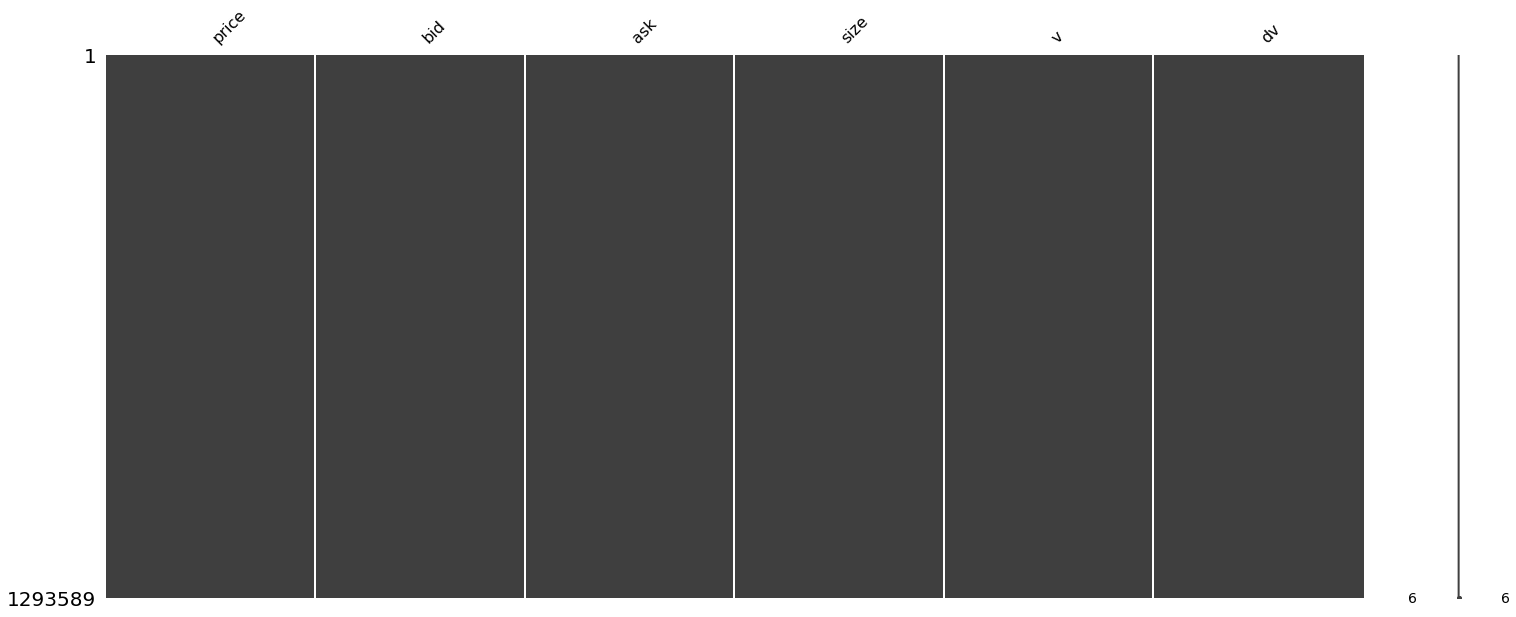

In [5]:
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

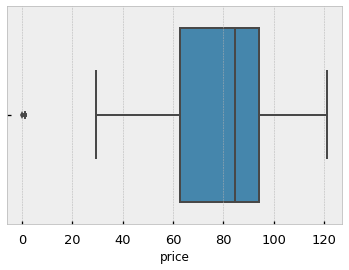

In [6]:
sns.boxplot(df.price)

In [7]:
@jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [8]:
mad = mad_outlier(df.price.values.reshape(-1,1))

In [9]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


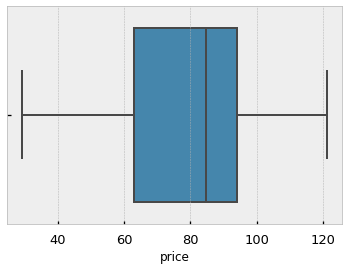

In [10]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.

In [11]:
df = df.loc[~mad]
cprint(df)

outfp = PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

In [12]:
infp=PurePath(data_dir/'processed'/'clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v          dv
dates                                                                  
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.0
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.7
2018-02-26 16:10:00  115.35  115.22  115.58       0       0         0.0
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.1
2018-02-26 18:30:00  115.35  114.72  117.38       0       0         0.0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1293578 entries, 2009-09-28 09:30:00 to 2018-02-26 18:30:00
Data columns (total 6 columns):
price    1293578 non-null float64
bid      1293578 non-null float64
ask      1293578 non-null float64
size     1293578

# Tick Bars

In [13]:
def tick_bars(df, column, m):
    '''
    compute tick bars
    
    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += i
        if ts >= m:
            idx.append(i)
            ts = 0
            continue   
    return idx

def tick_bar_df(df, column, m):
    idx = tick_bars(df, column, m)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

In [14]:
n_ticks = df.shape[0]
volume_ratio = (df.v.sum()/n_ticks).round()
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,293,578
volume ratio: 536.0
dollar ratio: 43767.0


In [15]:
tick_M = 10_000 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

 13%|█▎        | 169179/1293578 [00:00<00:00, 1691501.25it/s]

tick threshold: 10,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2257312.02it/s]


[141, 200, 245, 283, 317, 348, 376, 402, 427, 450]

In [16]:
df.iloc[tidx].shape, df.shape

((1287128, 6), (1293578, 6))

Dataset is large so select smaller example for quick exploration

In [17]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|██████████| 1293578/1293578 [00:00<00:00, 2161704.27it/s]


(1287128, 6)

In [18]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (456,))

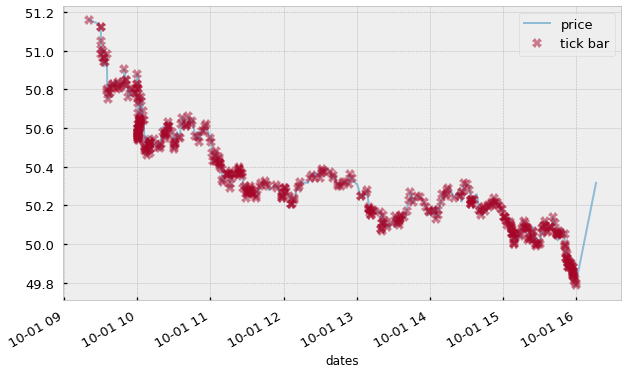

In [19]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,ax=plt.subplots(figsize=(10,6))
    ref.plot(*args, **kwds, ax=ax, label='price')
    sub.plot(*args, **kwds, ax=ax, marker='X', ls='', label=bar_type)
    ax.legend();
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5)

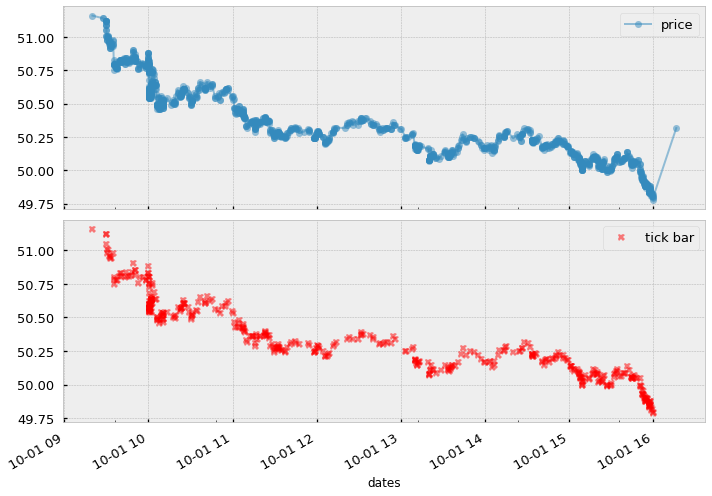

In [20]:
def plot_sample_data_sub(ref, sub, bar_type, *args, **kwds):
    f,ax = plt.subplots(2, figsize=(10,7), sharex=True)

    ref.plot(*args, **kwds, ax=ax[0], label='price', marker='o')
    sub.plot(*args, **kwds, ax=ax[1], ls='', marker='X', color='r', label=bar_type)

    for x in ax: x.legend()
    plt.tight_layout()
    return
    
plot_sample_data_sub(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)    

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [21]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [22]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

# Volume Bars

In [23]:
def volume_bars(df, column, m):
    '''
    compute volume bars
    
    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue   
    return idx

def volume_bar_df(df, column, m):
    idx = volume_bars(df, column, m)
    return df.iloc[idx].drop_duplicates()

In [24]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
v_bar_df = volume_bar_df(df, 'v', volume_M)
cprint(v_bar_df)

 15%|█▌        | 195207/1293578 [00:00<00:00, 1951634.47it/s]

volume threshold: 10,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2404381.24it/s]

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v           dv
dates                                                                   
2018-02-26 15:49:42  115.20  115.17  115.18     800     800     92160.00
2018-02-26 15:49:42  115.25  115.17  115.18   23923   23923   2757125.75
2018-02-26 15:58:15  115.24  115.24  115.25    3900    3900    449436.00
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.70
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.10
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54903 entries, 2009-09-28 09:44:09 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    54903 non-null float64
bid      54903 non-null float64
ask      54903 non-null float64
size     54903 no

xdf shape: (1466,), xtdf shape: (48,)


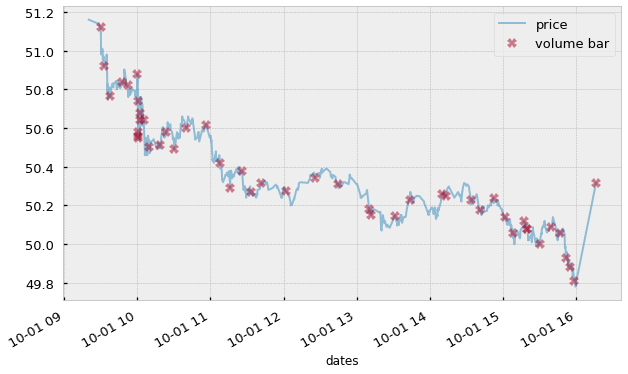

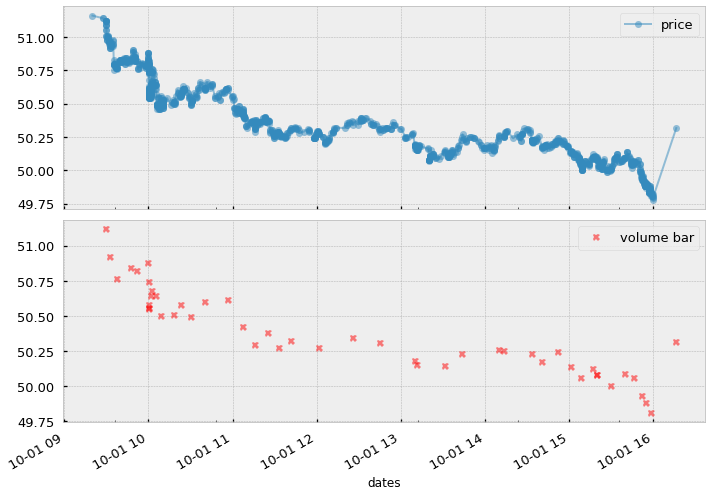

In [25]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5)
plot_sample_data_sub(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [26]:
def dollar_bars(df, column, m):
    '''
    compute dollar bars
    
    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue   
    return idx

def dollar_bar_df(df, column, m):
    idx = dollar_bars(df, column, m)
    return df.iloc[idx].drop_duplicates()

In [27]:
dollar_M = 1_00_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
dv_bar_df = dollar_bar_df(df, 'dv', dollar_M)
cprint(dv_bar_df)

 14%|█▍        | 186429/1293578 [00:00<00:00, 1863949.59it/s]

dollar threshold: 100,000


100%|██████████| 1293578/1293578 [00:00<00:00, 2382087.55it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask    size       v           dv
dates                                                                   
2018-02-26 15:59:16  115.30  115.30  115.31     116     116     13374.80
2018-02-26 15:59:45  115.31  115.31  115.32     492     492     56732.52
2018-02-26 15:59:59  115.35  115.34  115.36     700     700     80745.00
2018-02-26 16:00:00  115.35  115.34  115.35    5362    5362    618506.70
2018-02-26 16:16:14  115.30  114.72  115.62  778677  778677  89781458.10
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311175 entries, 2009-09-28 09:32:06 to 2018-02-26 16:16:14
Data columns (total 6 columns):
price    311175 non-null float64
bid      311175 non-null float64
ask      311175 non-null float64
size     3111

xdf shape: (1466,), xtdf shape: (192,)


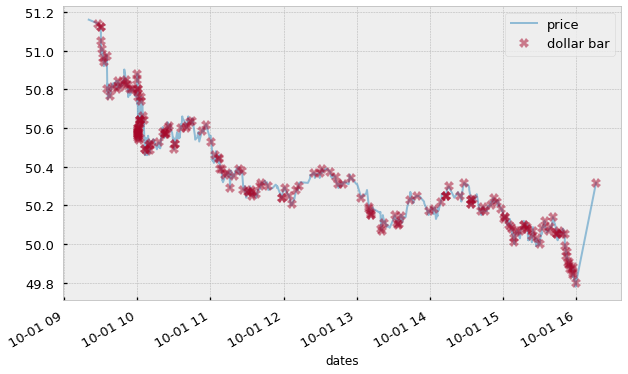

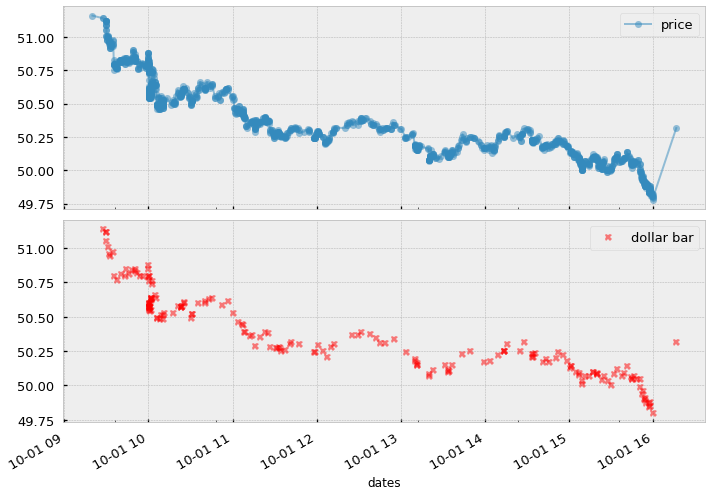

In [28]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5)
plot_sample_data_sub(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [29]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.TimeGrouper('1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [30]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))
vc = scale(count_bars(v_bar_df))
dc = scale(count_bars(dv_bar_df))


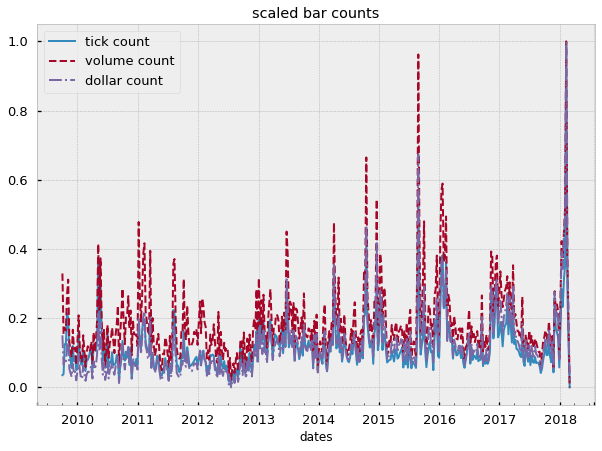

In [31]:
# plot time series of count

f,ax=plt.subplots(figsize=(10,7))

tc.plot(ax=ax, ls='-', label='tick count')
vc.plot(ax=ax, ls='--', label='volume count')
dc.plot(ax=ax, ls='-.', label='dollar count')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?

In [32]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar']
bar_std = [tc.std(),vc.std(),dc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 7.81%, vc std: 10.99%, dc std: 9.02%


tick      0.078080
dollar    0.090209
volume    0.109923
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?

In [33]:
bar_types = ['tick','volume','dollar']
bar_autocorr = [tc.autocorr(),vc.autocorr(),dc.autocorr()]
autocorrs = (pd.Series(bar_autocorr,index=bar_types))
autocorrs.sort_values()

tick      0.496263
volume    0.505140
dollar    0.619293
dtype: float64

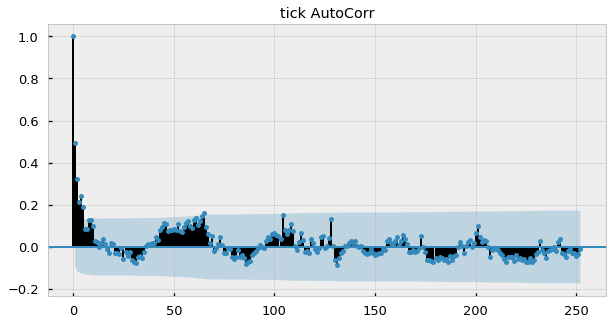

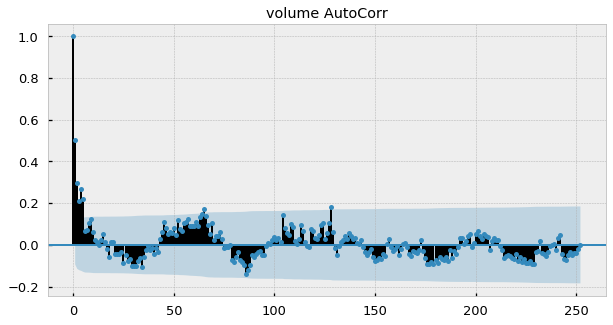

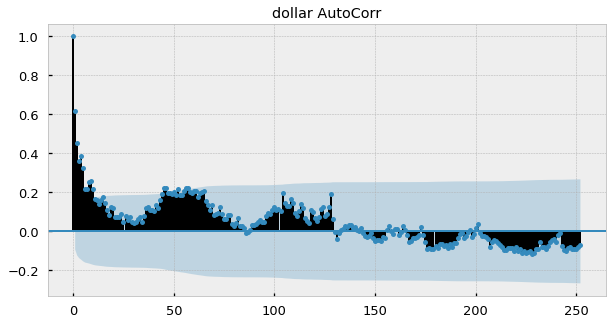

In [34]:
bar_types = ['tick','volume','dollar']
bar_counts = [tc, vc, dc]

for bar, typ in zip(bar_counts, bar_types):
    f,ax=plt.subplots(figsize=(10,5))
    sm.graphics.tsa.plot_acf(bar, lags=252, ax=ax, title=f'{typ} AutoCorr')

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [35]:
def returns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [36]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)

bar_returns = [tr, vr, dr]

In [37]:
def partition_monthly(s):
    return s.resample('1M').var()

In [38]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)

monthly_vars = [tr_rs, vr_rs, dr_rs]

In [39]:
for bar, bar_var in zip(bar_types, monthly_vars):
    print(f'variance of variances for {bar}: {bar_var.var()}')

variance of variances for tick: 5.757395040079699e-12
variance of variances for volume: 2.9473579070228856e-09
variance of variances for dollar: 7.135252799570184e-11


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?

In [40]:
np.random.seed(12345678)
for bar, bar_ret in zip(bar_types, bar_returns):
    print(f'sample size for {bar}: {bar_ret.shape[0]:,}')
    print(f'jarque-bera test statistic for {bar}: {stats.jarque_bera(bar_ret)[0]:,}')
    print()
    
df_ret = returns(df.price)    
print(f'jarque-bera test statistic for df returns: {stats.jarque_bera(df_ret)[0]:,.0f}')  

sample size for tick: 1,287,127
jarque-bera test statistic for tick: 163,872,942,193,913.94

sample size for volume: 54,902
jarque-bera test statistic for volume: 260,853,070,359.42923

sample size for dollar: 311,174
jarque-bera test statistic for dollar: 3,937,219,483,427.258

jarque-bera test statistic for df returns: 165,804,429,121,393


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

In [41]:
np.random.seed(12345678)
shap = lambda x: stats.shapiro(x)

for bar, bar_ret in zip(bar_types, bar_returns):
    print(f'sample size for {bar}: {bar_ret.shape[0]:,}')
    print(f'Shapiro-Wilk test statistic for {bar}: {shap(bar_ret)[0]:,.4f}')
    print()
    
print(f'Shapiro-Wilk test statistic for df returns: {shap(df_ret)[0]:,.4f}') 

sample size for tick: 1,287,127
Shapiro-Wilk test statistic for tick: 0.1726

sample size for volume: 54,902
Shapiro-Wilk test statistic for volume: 0.2767

sample size for dollar: 311,174
Shapiro-Wilk test statistic for dollar: 0.2669

Shapiro-Wilk test statistic for df returns: 0.1728


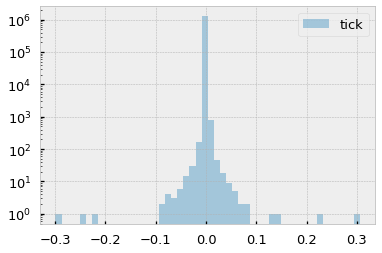

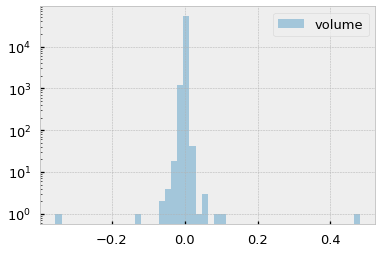

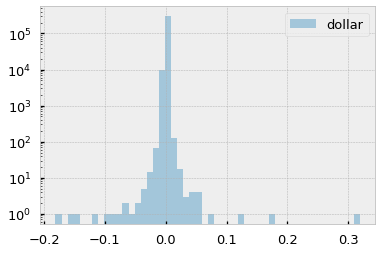

In [42]:
for bar, bar_ret in zip(bar_types, bar_returns):
    f, ax = plt.subplots()
    ax.set(yscale='log')
    sns.distplot(bar_ret,  ax=ax, label=f'{bar}', kde=False)
    ax.legend()

# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

In [43]:
dvBar = dv_bar_df.price
dvImb = bs = get_imbalance(df.price.values)*df.dv.iloc[1:]
cprint(dvBar.to_frame()), cprint(dvImb.to_frame())

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price
dates                      
2018-02-26 15:59:16  115.30
2018-02-26 15:59:45  115.31
2018-02-26 15:59:59  115.35
2018-02-26 16:00:00  115.35
2018-02-26 16:16:14  115.30
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311175 entries, 2009-09-28 09:32:06 to 2018-02-26 16:16:14
Data columns (total 1 columns):
price    311175 non-null float64
dtypes: float64(1)
memory usage: 14.7 MB
None
-------------------------------------------------------------------------------

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             dv
dates                          
2018-02-26 15:59:59  

(None, None)

In [44]:
dvBar.autocorr(), dvImb.autocorr()

(0.9999920426353037, 0.012264590019628941)

In [45]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImb)
dr.autocorr(), drImb[np.isfinite(drImb)].dropna().autocorr()

(0.09134912235422755, -0.2874690727168444)

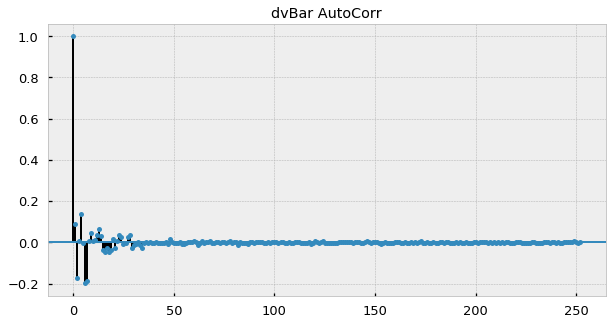

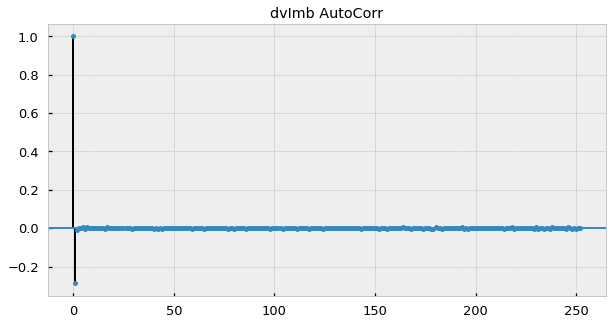

In [46]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

for bar, typ in zip(bar_rets, bar_types):
    f,ax=plt.subplots(figsize=(10,5))
    sm.graphics.tsa.plot_acf(bar[np.isfinite(bar)].dropna(), lags=252, ax=ax, title=f'{typ} AutoCorr')

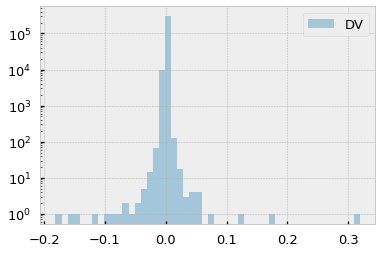

In [47]:
f, ax = plt.subplots()
ax.set(yscale='log')
sns.distplot(dr,  ax=ax, kde=False, label='DV')
ax.legend()

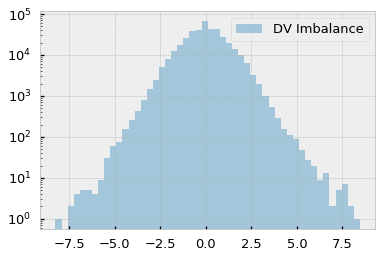

In [48]:
f, ax = plt.subplots()
ax.set(yscale='log')
sns.distplot(drImb[np.isfinite(drImb)].dropna(),
             ax=ax, kde=False, label='DV Imbalance')
ax.legend()

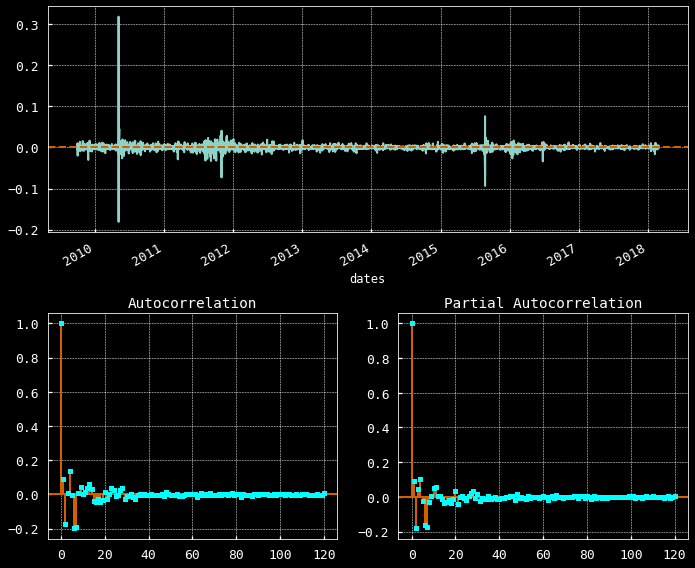

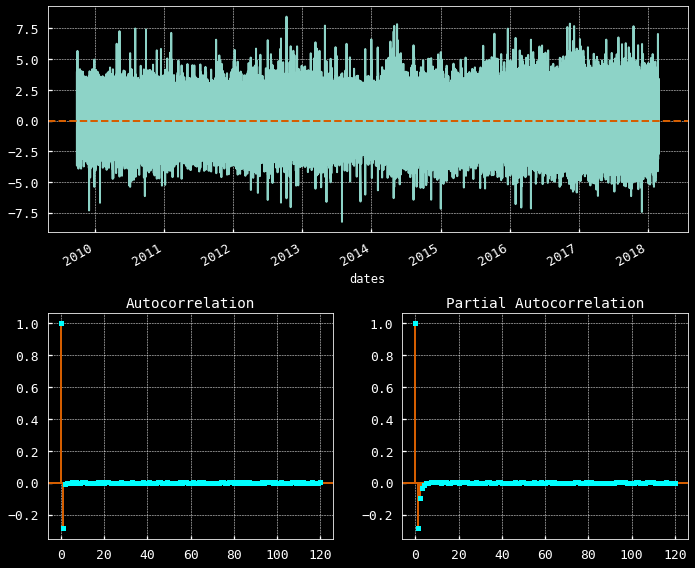

In [49]:
def tsplot(y, lags=None, **kwds):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    plt.style.use('dark_background')
    plt.rcParams['font.family'] = 'dejavu sans mono'        
        
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.axhline(0, color=red, ls='--', lw=2.)
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05, color=red)
    acf_ax.get_lines()[1].set_marker('s');
    acf_ax.get_lines()[1].set_markerfacecolor('cyan');
    acf_ax.get_lines()[1].set_markeredgecolor('cyan');

    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05, color=red)
    pacf_ax.get_lines()[1].set_marker('s');
    pacf_ax.get_lines()[1].set_markerfacecolor('cyan');
    pacf_ax.get_lines()[1].set_markeredgecolor('cyan');

    plt.tight_layout()
    return

## plot ##
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

for bar_ret, bar in zip(bar_rets, bar_types):
    bar_ret = bar_ret[np.isfinite(bar_ret)].dropna()
    tsplot(bar_ret, lags=120);

In [50]:
np.random.seed(12345678)

bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

for bar_ret, bar in zip(bar_rets, bar_types):
    bar_ret = bar_ret[np.isfinite(bar_ret)].dropna()
    print(f'sample size for {bar}: {bar_ret.shape[0]:,.4f}')
    print(f'jarque-bera test statistic for {bar}: {stats.jarque_bera(bar_ret)[0]:,.4f}')
    print()

sample size for dvBar: 311,174.0000
jarque-bera test statistic for dvBar: 3,937,219,483,427.2578

sample size for dvImb: 391,548.0000
jarque-bera test statistic for dvImb: 19,116.8720



In [51]:
np.random.seed(12345678)

bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

shap = lambda x: stats.shapiro(x)
for bar_ret, bar in zip(bar_rets, bar_types):
    bar_ret = bar_ret[np.isfinite(bar_ret)].dropna()    
    print(f'sample size for {bar}: {bar_ret.shape[0]:,.4f}')
    print(f'Shapiro-Wilk test statistic for {bar}: {shap(bar_ret)[0]:,.4f}')
    print()

sample size for dvBar: 311,174.0000
Shapiro-Wilk test statistic for dvBar: 0.2669

sample size for dvImb: 391,548.0000
Shapiro-Wilk test statistic for dvImb: 0.9923

